In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
import cv2
from PIL import Image
import random
from albumentations import *
from tqdm import tqdm

In [2]:
! pip install albumentations

In [4]:
AUG = [ HorizontalFlip, ShiftScaleRotate, RandomRotate90, RandomBrightnessContrast,
        Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion ]
print(len(AUG))

9


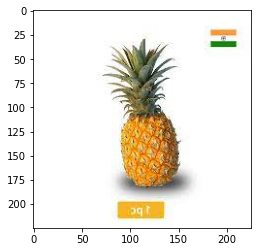

In [40]:
path0="E:\Imarticus/NalaiyaThiran/Dataset/TEST_SET/test2.jpg"
image0c=cv2.imread(path0)
aug=AUG[0](p=1)
image2c=aug(image=image0c)['image']
plt.figure(figsize=(4,4))
plt.imshow(cv2.cvtColor(image2c,cv2.COLOR_BGR2RGB))
plt.show()

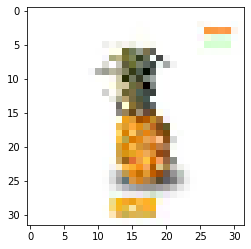

In [41]:
image0a=load_img(path0, grayscale=False, color_mode='rgb', target_size=(32,32))
image1a=np.asarray(image0a)
aug=AUG[0](p=1)
image2a=aug(image=image1a)['image']
plt.figure(figsize=(4,4))
plt.imshow(image2a)
plt.show()

In [42]:
data_dir = "E:/Imarticus/NalaiyaThiran\Dataset\TRAIN_SET"

In [6]:
Name=[]
for file in os.listdir(data_dir):
    Name+=[file]
print(Name)
print(len(Name))

['APPLES', 'BANANA', 'ORANGE', 'PINEAPPLE', 'WATERMELON']
5


In [7]:
N=[]
for i in range(len(Name)):
    N+=[i]

normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

In [8]:
dataset=[]
datalabel=[]
count=0
for file in tqdm(os.listdir(data_dir)):
    path=os.path.join(data_dir,file)
    for im in os.listdir(path):
        image0=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(32,32))
        image1=np.asarray(image0)
        for i in range(len(AUG)):
            aug=AUG[i](p=1)
            image2=aug(image=image1)['image']       
            image3=image2/255.0
            if image3.sum()>20:
                dataset+=[image3]
                datalabel+=[count]        
    count=count+1


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:10<00:00, 14.03s/it]


In [9]:
m=len(dataset)
print(m)
M=[]
for i in range(m):
    M+=[i]
random.seed(2021)
random.shuffle(M)

trainX=np.array(dataset)[M[0:(m//4)*3]]
testX=np.array(dataset)[M[(m//4)*3:]]
trainY=np.array(datalabel)[M[0:(m//4)*3]]
testY=np.array(datalabel)[M[(m//4)*3:]]

37062


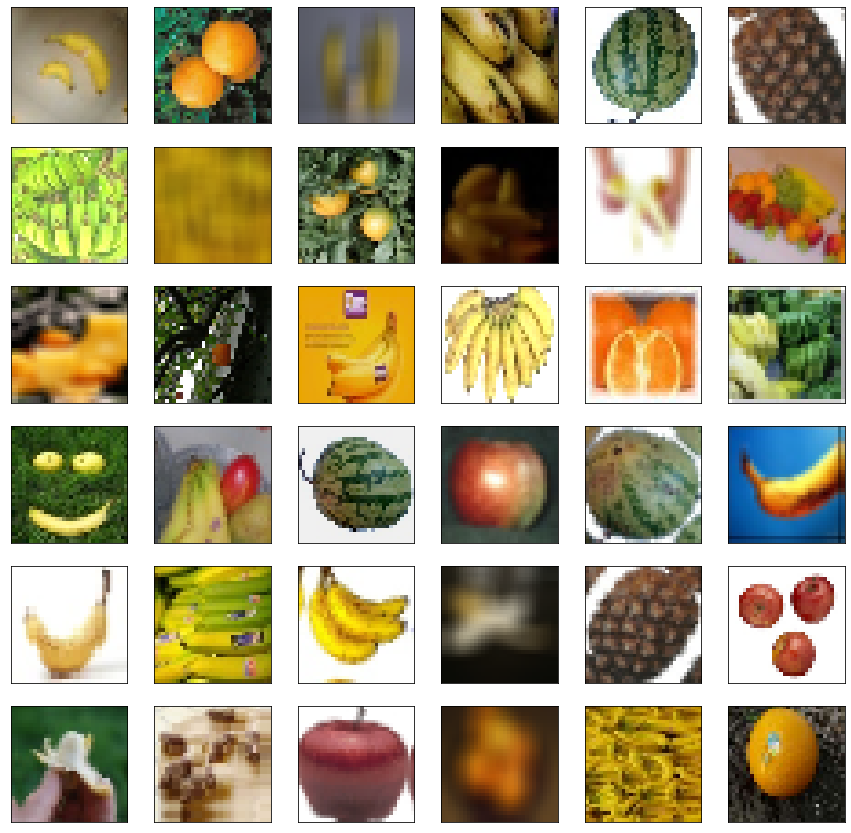

In [10]:
fig,axs = plt.subplots(6,6,figsize=(15,15))
for i in range(36):
    image=dataset[M[i]]
    r=i//6
    c=i%6
    axs[r][c].set_xticks([])
    axs[r][c].set_yticks([])
    ax=axs[r][c].imshow(image)
plt.show()

In [11]:
trainlabels1=to_categorical(trainY)
trainlabels=np.array(trainlabels1)

In [12]:
trainx,testx,trainy,testy=train_test_split(trainX,trainlabels,test_size=0.2,random_state=44)

In [13]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(22236, 32, 32, 3)
(5559, 32, 32, 3)
(22236, 5)
(5559, 5)


In [14]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

In [15]:
pretrained_model3 = tf.keras.applications.DenseNet201(input_shape=(32,32,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

74850304/74836368 [==============================] - 103s 1us/step


In [16]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(5, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

In [17]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=10)

Epoch 1/10
695/695 [==============================] - 111s 160ms/step - loss: 0.3324 - accuracy: 0.8698 - val_loss: 0.3209 - val_accuracy: 0.8730
Epoch 2/10
695/695 [==============================] - 110s 158ms/step - loss: 0.2975 - accuracy: 0.8825 - val_loss: 0.3051 - val_accuracy: 0.8768
Epoch 3/10
695/695 [==============================] - 109s 156ms/step - loss: 0.2864 - accuracy: 0.8883 - val_loss: 0.2782 - val_accuracy: 0.8908
Epoch 4/10
695/695 [==============================] - 113s 162ms/step - loss: 0.2725 - accuracy: 0.8909 - val_loss: 0.2655 - val_accuracy: 0.8966
Epoch 5/10
695/695 [==============================] - 111s 160ms/step - loss: 0.2567 - accuracy: 0.8994 - val_loss: 0.2608 - val_accuracy: 0.9005
Epoch 6/10
695/695 [==============================] - 112s 160ms/step - loss: 0.2453 - accuracy: 0.9067 - val_loss: 0.2534 - val_accuracy: 0.9021
Epoch 7/10
695/695 [==============================] - 109s 156ms/step - loss: 0.2346 - accuracy: 0.9065 - val_loss: 0.2475 -

In [20]:
testlabels1=to_categorical(testY)
testlabels=np.array(testlabels1)

In [21]:
y_pred=model.predict(testX)
pred=np.argmax(y_pred,axis=1)
ground=np.argmax(testlabels,axis=1)
print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2217
           1       0.92      0.90      0.91      3091
           2       0.88      0.90      0.89      2287
           3       0.99      1.00      1.00       611
           4       1.00      1.00      1.00      1061

    accuracy                           0.92      9267
   macro avg       0.94      0.94      0.94      9267
weighted avg       0.92      0.92      0.92      9267



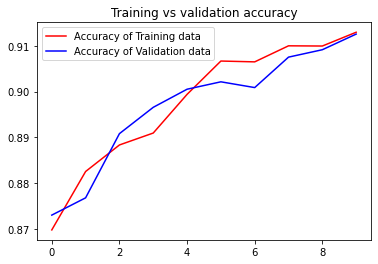

<Figure size 432x288 with 0 Axes>

In [22]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

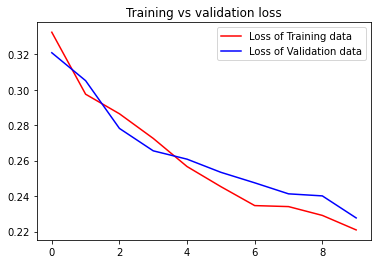

<Figure size 432x288 with 0 Axes>

In [23]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

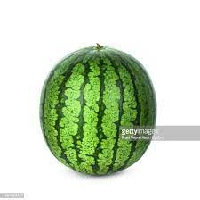

In [48]:
path0="E:\Imarticus/NalaiyaThiran\Dataset\TEST_SET\download.jpg"
load_img(path0,target_size=(200,200))

In [49]:
image=load_img(path0,target_size=(32,32))
image=img_to_array(image) 
image=image/255.0
prediction_image=np.expand_dims(image, axis=0)
print(prediction_image.shape)

(1, 32, 32, 3)


In [50]:
prediction=model.predict(prediction_image)
value=np.argmax(prediction)
move_name=reverse_mapping[value]
print("Prediction is {}.".format(move_name))

Prediction is WATERMELON.


In [51]:
pred2=model.predict(testX)

PRED=[]
for item in pred2:
    value2=np.argmax(item)      
    PRED+=[value2]
print(PRED[0:10])

[4, 0, 2, 1, 1, 1, 1, 1, 1, 2]


In [29]:
ANS=list(testY)
print(ANS[0:10])

[4, 0, 2, 0, 1, 1, 1, 1, 1, 2]


In [30]:
accuracy=accuracy_score(ANS,PRED)
print(accuracy)

0.9193913887989641
